# Sheep TS intro

Import required libraries

In [2]:
import tskit

In [3]:
import numpy as np

In [4]:
import subprocess

Uncomment and run to download the GitHub repo containing the workshop data:

In [5]:
#subprocess.run(["wget", "https://github.com/HighlanderLab/sheepTSexample/archive/refs/heads/main.zip"])

List directory contents (you may have to navigate using `cd`) to see if `main.zip` is present.

In [6]:
ls

00TSintro.ipynb  01TSanalyses.ipynb  main.zip  main.zip.1  sheepTSexample-main/


Uncomment an run to decompress `main.zip` (the Gitub repo that contains the workshop data)

In [7]:
#subprocess.run(["unzip", "main.zip"])

In [8]:
ls

00TSintro.ipynb  01TSanalyses.ipynb  main.zip  main.zip.1  sheepTSexample-main/


In [9]:
ls sheepTSexample-main/

01runScrm1M.sh  LICENSE    test1M.out         test1M.out.inf.vcf  ts1
02inferTs.py    README.md  test1M.out.inf.ts  tiny_ts.ts          ts2


Load tree sequence

In [10]:
ts = tskit.load("sheepTSexample-main/tiny_ts.ts")

Print out tree sequence summary

In [11]:
ts

What type is it?

In [12]:
type(ts)

tskit.trees.TreeSequence

Visualise (this only makes sense for small TS object with few trees).

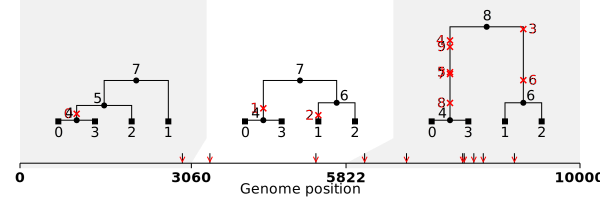

In [13]:
ts.draw_svg()

Draw the same but without (the red) mutations.

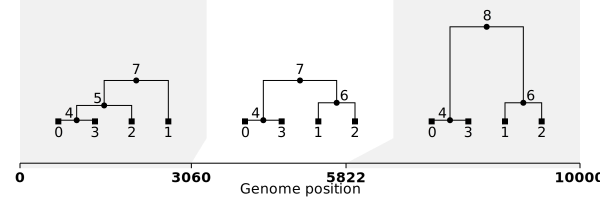

In [14]:
ts.draw_svg(omit_sites=True)

Selet the first tree in the tree sequence.

In [15]:
ts.first()

Plot it:

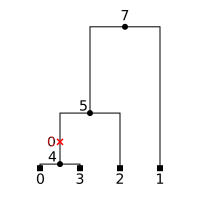

In [16]:
ts.first().draw_svg()

Can also plot as text. Don't forget `print()` otherwise it comes out as a string with line break characters.

In [17]:
print(ts.first().draw_text())

    7  
  ┏━┻━┓
  5   ┃
 ┏┻━┓ ┃
 4  ┃ ┃
┏┻┓ ┃ ┃
0 3 2 1



## Look into the table that underlie the tree sequence format

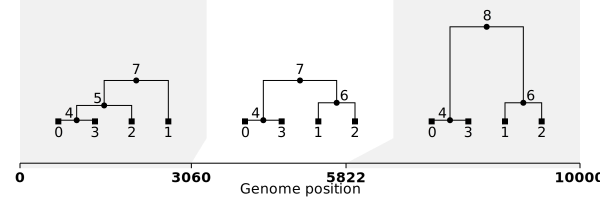

In [19]:
ts.draw_svg(omit_sites=True)

In [20]:
ts.tables.nodes

id,flags,population,individual,time,metadata
0,1,0,0,0.00000000,
1,1,0,0,0.00000000,
2,1,0,1,0.00000000,
3,1,0,1,0.00000000,
4,0,0,-1,68.22262809,
5,0,0,-1,914.87455689,
6,0,0,-1,1067.52208671,
7,0,0,-1,2346.80413120,
8,0,0,-1,5424.15871673,


In [21]:
ts.tables.edges

id,left,right,parent,child,metadata
0,0,10000,4,0,
1,0,10000,4,3,
2,0,3060,5,2,
3,0,3060,5,4,
4,3060,10000,6,1,
5,3060,10000,6,2,
6,0,3060,7,1,
7,3060,5822,7,4,
8,0,3060,7,5,
9,3060,5822,7,6,


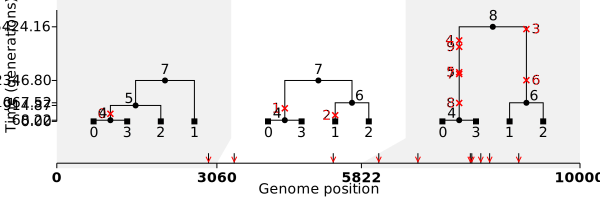

In [22]:
ts.draw_svg(omit_sites=False, y_axis=True)

Look into sites and mutations tables

In [23]:
ts.tables.sites

id,position,ancestral_state,metadata
0,2900,A,
1,3391,C,
2,5284,A,
3,6154,A,
4,6902,G,
5,7904,A,
6,7932,A,
7,8104,A,
8,8273,C,
9,8829,C,


In [24]:
ts.tables.mutations

id,site,node,time,derived_state,parent,metadata
0,0,4,436.78917194,C,-1,
1,1,4,751.01023306,A,-1,
2,2,1,352.63971670,C,-1,
3,3,6,5291.85815154,G,-1,
4,4,4,4642.05970742,C,-1,
5,5,4,2818.91420369,C,-1,
6,6,6,2361.52315316,T,-1,
7,7,4,2715.32355793,G,-1,
8,8,4,1056.07074569,A,-1,
9,9,4,4274.42748637,G,-1,


Generate genotype matrix and compare to trees

In [25]:
ts.genotype_matrix()

array([[1, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1]], dtype=int32)

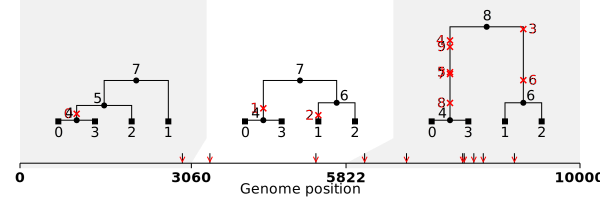

In [26]:
ts.draw_svg()

## Modifying tree sequences
Table collections inderlying tree sequences are immutable by default. But one can create a mutable copy:

In [29]:
myTabs = ts.tables.copy()

In [30]:
myTabs.nodes

id,flags,population,individual,time,metadata
0,1,0,0,0.00000000,
1,1,0,0,0.00000000,
2,1,0,1,0.00000000,
3,1,0,1,0.00000000,
4,0,0,-1,68.22262809,
5,0,0,-1,914.87455689,
6,0,0,-1,1067.52208671,
7,0,0,-1,2346.80413120,
8,0,0,-1,5424.15871673,


In [31]:
myTabs.nodes[8]

NodeTableRow(flags=0, time=5424.158716732344, population=0, individual=-1, metadata=b'')

Let as change the age of node 8. The recommanded way is to replace the corresponding row by a new `NodeTableRow`:

In [33]:
myTabs.nodes[8] = tskit.NodeTableRow(flags=0, time=20_000, population=0, individual=-1, metadata=b'')

In [34]:
myTabs.nodes

id,flags,population,individual,time,metadata
0,1,0,0,0.00000000,
1,1,0,0,0.00000000,
2,1,0,1,0.00000000,
3,1,0,1,0.00000000,
4,0,0,-1,68.22262809,
5,0,0,-1,914.87455689,
6,0,0,-1,1067.52208671,
7,0,0,-1,2346.80413120,
8,0,0,-1,20000.00000000,


To create a TS from a table collection, the collection must be sorted and then the tree_sequence method can be called:

In [36]:
myTabs.sort()

In [37]:
myTs = myTabs.tree_sequence()

Here, node 8 is much older than in the original sequence:

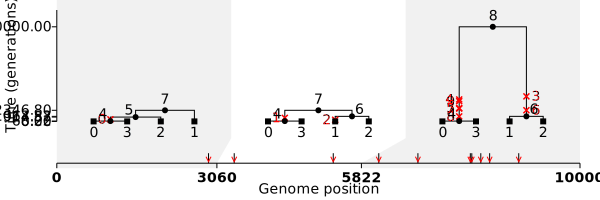

In [40]:
myTs.draw_svg(y_axis=True)

Original for comparison

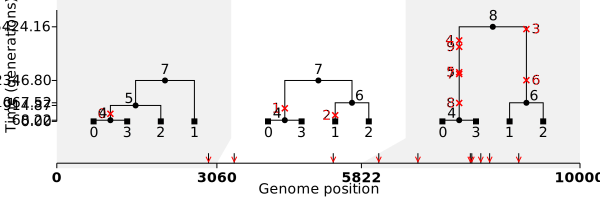

In [41]:
ts.draw_svg(y_axis=True)